In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
 #from sklearn.cross_validation import train_test_split  #适用于anaconda 3.6及以前版本
from sklearn.model_selection import train_test_split #适用于anaconda 3.7及以后版本

In [3]:
iris = datasets.load_iris()
# Bunch的属性有：
# data：数据数组。
# target：文件分类。如鸢尾花三类的，与filenames一一对应为0、1、2。
# target_names：标签名。可以自定义，默认为文件夹名。
# DESCR：数据描述。
# filenames：文件名。

In [5]:
se = iris.data[0:50] # 山鸢尾特征，50行
ve = iris.data[50:100] # 变色鸢尾特征，50行
vi = iris.data[100:150] # 维吉尼亚特征，50行
se

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
comb = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]] #二维图像，4个特征两两组合

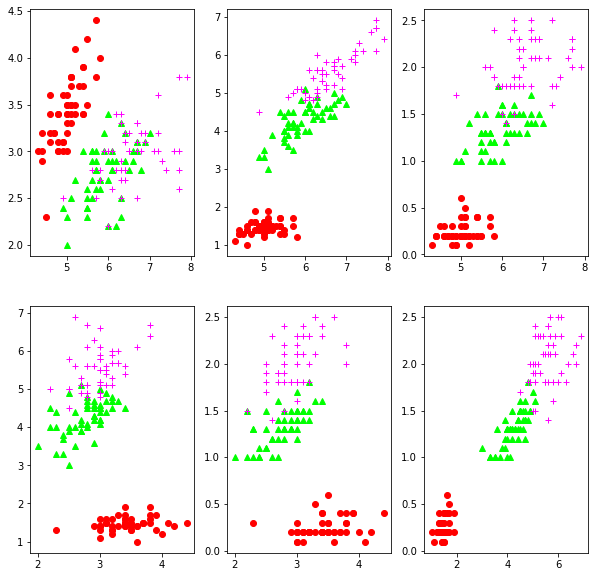

In [11]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(231+i)
    plt.plot(se[:,comb[i][0]],se[:,comb[i][1]],'o',color="#ff0000")
    plt.plot(ve[:,comb[i][0]],ve[:,comb[i][1]],'^',color='#00ff00')
    plt.plot(vi[:,comb[i][0]],vi[:,comb[i][1]],'+',color='#ff00ff')
plt.show()

## KNN

In [38]:

X_train,X_test,y_train,y_test = train_test_split(\
    iris['data'],iris['target'],random_state=0)

print("训练样本数据的大小：{}".format(X_train.shape))
print("训练样本标签的大小：{}".format(y_train.shape))
print("测试样本数据的大小：{}".format(X_test.shape))
print("测试样本标签的大小：{}".format(y_test.shape))

训练样本数据的大小：(112, 4)
训练样本标签的大小：(112,)
测试样本数据的大小：(38, 4)
测试样本标签的大小：(38,)


In [39]:
knn= neighbors.KNeighborsClassifier(n_neighbors = 3)
# 训练模型
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# 评估模型
print("模型精度：{:.2f}".format(np.mean(y_pred==y_test)))
print("模型精度：{:.2f}".format(knn.score(X_test,y_test)))


模型精度：0.97
模型精度：0.97


In [41]:
X_new = np.array([[1.1,5.9,1.4,2.2]])
prediction = knn.predict(X_new)
print("预测的目标类别是：{}".format(prediction))
print("预测的目标类别花名是：{}".format(iris['target_names'][prediction]))

预测的目标类别是：[0]
预测的目标类别花名是：['setosa']


## SVM

In [35]:
X = iris.data
y = iris.target
print(X.shape,y.shape)
# 利用label_binarize将鸢尾花的类别进行二值化处理，即将鸢尾花的三个类转化为001、010、100的格式。
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


(150, 4) (150,)


In [25]:
#对X增加800维噪声特征，来增加分离难度。
random_state = np.random.RandomState(0) # 伪随机数
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)] #通过np.c_[ ]在原始X矩阵的基础上增加800维噪声特征。

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=random_state)

In [27]:
# 调用OneVsRestClassifier模块将分类问题转换为两类的分类问题从而构建一个新的分类器。基本的分类器仍使用SVM。
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

In [28]:
#我们将训练集输入分类器中进行拟合训练，训练完成之后，我们将测试集中的样本特征输入进去，从而得到测试集中每个样本的预测分数y_score。
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [29]:
#定义三个字典precision、recall、average_precision。
precision = dict()
recall = dict()
average_precision = dict()

In [30]:
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],  y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# 下划线"_"是返回的阈值。作为一个名称：此时"_"作为临时性的名称使用，表示分配了一个特定的名称，但是并不会在后面再次用到该名称。

In [31]:
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),  y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

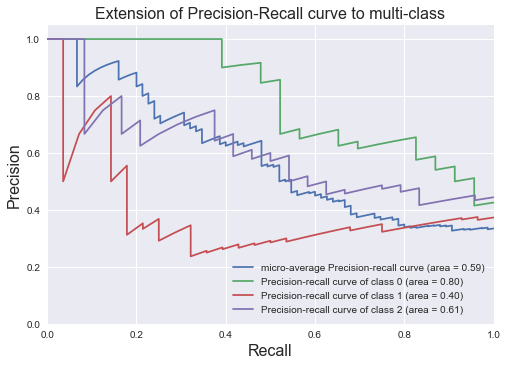

In [32]:
# Plot Precision-Recall curve for each class
plt.style.use('seaborn') #选择'seaborn'画布分格，使绘图美观一点
plt.clf()#clf 函数用于清除当前图像窗口
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))
#xlim、ylim：分别设置X、Y轴的显示范围。
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#设置横纵坐标标题
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision',fontsize=16)
#设置P-R图的标题
plt.title('Extension of Precision-Recall curve to multi-class',fontsize=16)
plt.legend(loc="lower right")#legend 是用于设置图例的函数
plt.show()